# Web Scraping



Es una técnica que sirve para extraer información de páginas web de forma **automática** así podemos obtener grandes volumenes de información de diferentes sitios.


   **RECOLECCIÓN** -> ALMACENAMIENTO -> TRATAMIENTO -> VISUALIZACIÓN 
                        
                        
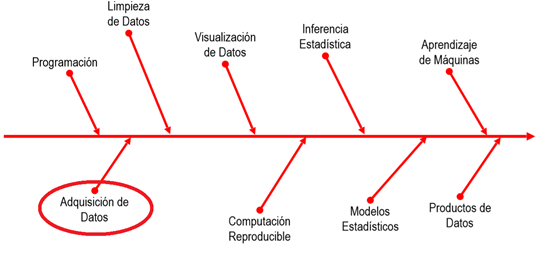



Minería de datos 

Monitoreo de cambio de precio en línea y comparación de precios

Monitoreo de datos meteorológicos  

Integración de datos web

Recopilación de listados de bienes raíces

** ... **

                                  


                               'Nombre','apellido','autorID','articulos','indice-h'
                                Juan D.,  Velasquez,26649280600,1,1
                                Carlos Jaime,Franco,7103081268,1,1
                                Jackeline D.,Perez,56583222900,1,1
                                Carlos A.,Martinez,57192164250,1,1

## Beautiful Soup ##   
  
*"Beautiful Soup is a Python library for pulling data out of HTML and XML files."* 


[Documentación](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) de Beautiful Soup



    pip install beautifulsoup4
    pip install requests


In [5]:
from bs4 import BeautifulSoup       # libreria para analizar doc HTML (arbol con todos los elementos)
from requests import session        # “post”, “get”, “put”, “patch”, “delete”, “head” y “options”  RESTFUL, persistir solicitud
import getpass                      #*******


username = input('Ingrese su usuario SIN el @unal.edu.co: ')
print('ingrese su contraseña')
password = getpass.getpass()
datos = {'user': username,'pass': password,'submit':'Ingresar'}


with session() as c:  
    
    while (True):
        
        #paso los parámetros a la página de logueo, y luego obtengo la página inicial de scopus
        c.post('https://login.ezproxy.unal.edu.co/login', data=datos)
        
        main_page = c.get('https://login.ezproxy.unal.edu.co/login?url=http://www.scopus.com/')
        
        if main_page.url != 'https://www-scopus-com.ezproxy.unal.edu.co/search/form.uri?display=basic':
            print('Ha ocurrido un error')
        else:
            print('El Login fue correcto \n')
            break    
            
    
    profesores = open("ws/profesores.csv").readlines()
    profesores = [x.replace('\n','') for x in profesores]
    profesores = [x.split(',') for x in profesores]
        
    with open('ws/profesores.csv','w',encoding="utf-8") as file:
        
        #escribimos la cabecera del archivo profesores
        file.write(','.join(profesores[0]))
        file.write('\n')
            
        for x in range(1,len(profesores)):
            
            profesor_page = c.get("https://www-scopus-com.ezproxy.unal.edu.co/authid/detail.uri?origin=AuthorProfile&authorId="+str(profesores[x][2])+"&zone=")
            
                                                  #html.parser,lxml  estructura en la que vamos a representar el árbol
            file_soup = BeautifulSoup(profesor_page.content,"lxml")  #pasamos el contenido de la página a un Objeto BeatifulSoup()
                        
            #print(file_soup.prettify())
                       
                            
            results =  file_soup.findAll('div',{'class':'panel-body'})  #div-> etiqueta que define el bloque, panel-body --> class name 
                        
            """
            results[0]
                <div class="panel-body">
                    <span class="fontLarge">5</span>
                </div>
            """
            
            hindex = results[0].find('span').get_text()
            
            """
            results[1]
            
            <div class="panel-body">
                <span class="fontLarge pull-left">64</span>
                <button class="btn btn-sm btn-link color pull-right noPadding" onclick="submitAuthorFormForClickedLinks('HirschSingleAuthorEvaluatorButton');" title="View charts and graphs related to this author" type="button">
                    <span class="btnText">Analyze author output</span>
                </button>
            </div>

            """                       
            articulos = results[1].find('span').get_text()

            print(profesores[x])
            
            #sustitución
            profesores[x][3] = articulos
            profesores[x][4] = hindex

            print(profesores[x])        
         
            file.write(','.join(profesores[x]))
            file.write('\n')
            
        file.close()

Ingrese su usuario SIN el @unal.edu.co: adtamayop
ingrese su contraseña
········
El Login fue correcto 

['"Juan D."', '"Velasquez"', '26649280600', '1', '1']
['"Juan D."', '"Velasquez"', '26649280600', '64', '5']
['"Carlos Jaime"', '"Franco"', '7103081268', '1', '1']
['"Carlos Jaime"', '"Franco"', '7103081268', '53', '7']
['"Jackeline D."', '"Perez"', '56583222900', '1', '1']
['"Jackeline D."', '"Perez"', '56583222900', '8', '5']
['"Carlos A."', '"Martinez"', '57192164250', '1', '1']
['"Carlos A."', '"Martinez"', '57192164250', '5', '2']


# Selenium

[Documentación](http://selenium-python.readthedocs.io/) de Selenium para Python


Selenium Web Driver es una herramienta creada principalmente para la automatización de pruebas o tareas diarias sobre aplicaciones web, pues permite abrir el navegador y llevar a cabo tareas que un humano debería de hacer tales como:
hacer click en botones,Ingresar información en formularios, Buscar información específica en una página web, pero a la vez es una potente herramienta de web scraping 

    pip install selenium

[PhantomJS](http://phantomjs.org/download.html)

[ChromeDrive](https://sites.google.com/a/chromium.org/chromedriver/)


In [6]:
from selenium import webdriver
import getpass

#librerías necesarias para hacer un Wait explícito en las peticiones a la pág, esto con el fin de darle un tiempo de carga
#a los elementos dinámicos que apenas van cargando, y no tener que colocar un Time.Sleep() , pues aveces puede cargar más ligero
#como en otras ocasiones cargar más lento, y sacar errores o excepciones al no encontrar el elemento deseado

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
import time

username = input('Ingrese su usuario SIN el @unal.edu.co: ')
print('Ingrese su contraseña: ')
password = getpass.getpass()

#pagina = webdriver.PhantomJS(r"C:\Users\andre\Google Drive\Synced\PAE\Librería\phantomjs-2.1.1-windows\bin\phantomjs.exe")
pagina = webdriver.Chrome(r"C:\Users\andre\Google Drive\Synced\PAE\Librería\chromedriver.exe")
         
pagina.get("https://login.ezproxy.unal.edu.co/login?url=https://www.scopus.com")

espera = WebDriverWait(pagina,20)

success = False

while not success:

    try:
                  
        usuario = pagina.find_element_by_name("user")
        contraseña = pagina.find_element_by_name("pass")
        
        usuario.send_keys(username)
        contraseña.send_keys(password)
                                                        
        login_attempt = espera.until(EC.presence_of_element_located((By.XPATH,"/html/body/div[1]/form/input[2]")))
        #login_attempt.submit()
        login_attempt.click()
        
        success = True

    except TimeoutException:
        pagina.get("https://login.ezproxy.unal.edu.co/login?url=https://www.scopus.com")

        
profesores = open("ws/profesores.csv").readlines()
profesores = [x.replace('\n','') for x in profesores]
profesores = [x.split(',') for x in profesores]
        
with open('ws/profesores.csv','w') as file:
        
    file.write(','.join(profesores[0]))
    file.write('\n')
    
    for x in range(1,len(profesores)):
        
        pagina.get('https://www-scopus-com.ezproxy.unal.edu.co/authid/detail.uri?origin=resultslist&authorId=' + str((profesores[x][2])) + '&zone=')
          
        #time.sleep(3)

        success = False
        while not success:
            
            try:
                                                                                                      
                numero_articulos_autor = int(espera.until(EC.visibility_of_element_located((By.XPATH, '//*[@id="authorDetailsDocumentsByAuthor"]/div/div[2]/span'))).text)
                indice_h_autor = int(espera.until(EC.visibility_of_element_located((By.XPATH, '//*[@id="authorDetailsHindex"]/div/div[2]/span'))).text)
                
                print(profesores[x])   
                    
                profesores[x][3] = str(numero_articulos_autor)
                profesores[x][4] = str(indice_h_autor)

                print(profesores[x])      
                  
                file.write(','.join(profesores[x]))
                file.write('\n')
                
                success = True
                
            except (TimeoutException,NoSuchElementException):

                pagina.get('https://www-scopus-com.ezproxy.unal.edu.co/authid/detail.uri?origin=resultslist&authorId='+str(id)+'&zone=')
                time.sleep(3)
                
pagina.close()


Ingrese su usuario SIN el @unal.edu.co: adtamayop
Ingrese su contraseña: 
········
['"Juan D."', '"Velasquez"', '26649280600', '1', '1']
['"Juan D."', '"Velasquez"', '26649280600', '64', '5']
['"Carlos Jaime"', '"Franco"', '7103081268', '53', '7']
['"Carlos Jaime"', '"Franco"', '7103081268', '53', '7']
['"Jackeline D."', '"Perez"', '56583222900', '8', '5']
['"Jackeline D."', '"Perez"', '56583222900', '8', '5']
['"Carlos A."', '"Martinez"', '57192164250', '5', '2']
['"Carlos A."', '"Martinez"', '57192164250', '5', '2']
